## The Sparks Foundation GRIP March 2022
## Internship - Data Science and Business Analytics

Author: Dion Philip

## Task 6 - Prediction using Decision Trees Algorithm

### Problem Statement: For the given iris dataset, create the Decision Tree Classifier and visualize it graphically

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

## Reading the dataset

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [3]:
iris.drop('Id',axis=1,inplace=True)

In [4]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.shape

(150, 5)

### Checking for null values

In [7]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Summary Statistics
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
iris.groupby('Species').agg(['mean']).reset_index()

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
,,mean,mean,mean,mean
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


## Data Visualization

### Plotting Histograms

<AxesSubplot:>

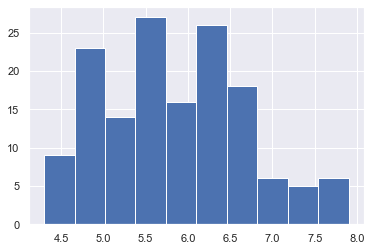

In [12]:
iris.SepalLengthCm.hist()

<AxesSubplot:>

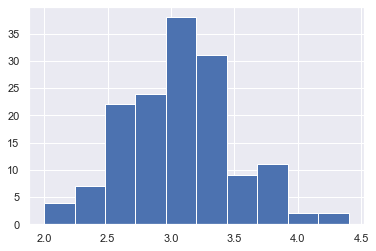

In [13]:
iris.SepalWidthCm.hist()

<AxesSubplot:>

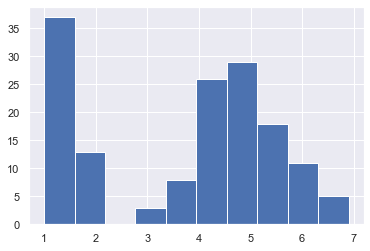

In [14]:
iris.PetalLengthCm.hist()

<AxesSubplot:>

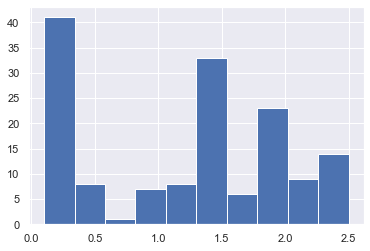

In [15]:
iris.PetalWidthCm.hist()

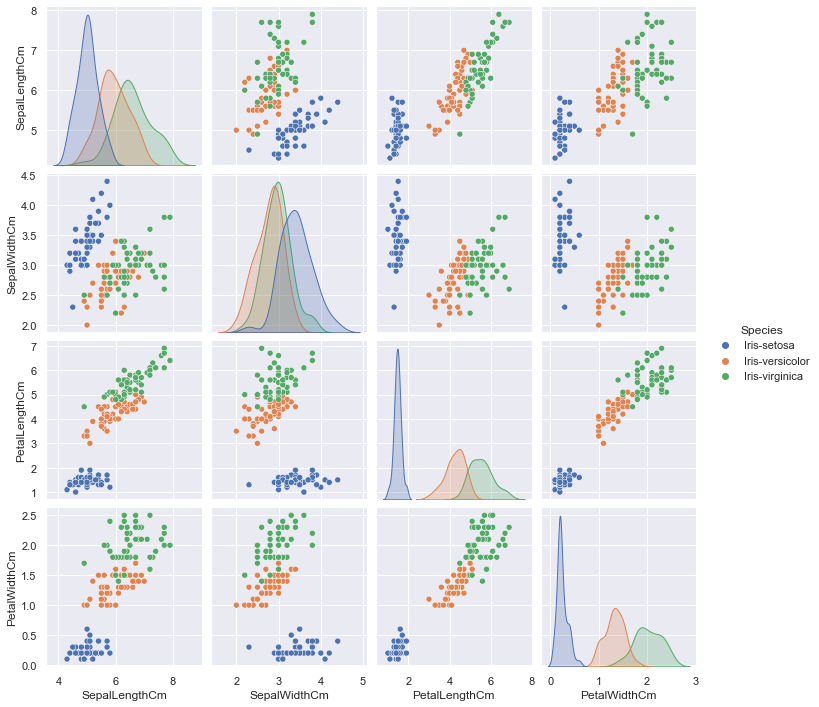

In [16]:
sns.pairplot(iris, hue='Species')

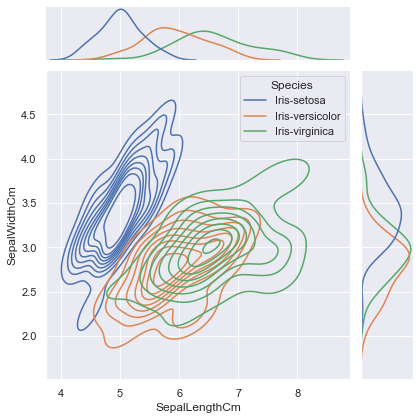

In [17]:
# Joint Plot
sns.jointplot(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'], hue='Species', data=iris, kind='kde', color='g')

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

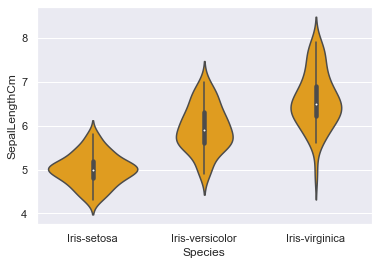

In [18]:
# Violin Plot
sns.violinplot(x='Species', y=iris['SepalLengthCm'], data=iris, color='orange')

<AxesSubplot:xlabel='Species', ylabel='count'>

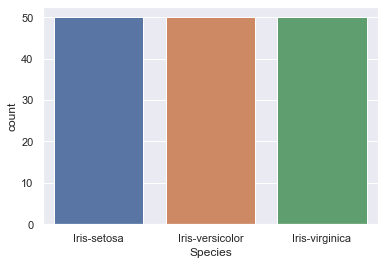

In [19]:
# Countplot
sns.countplot('Species', data=iris)

## Merging the boxplot and strippplot

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

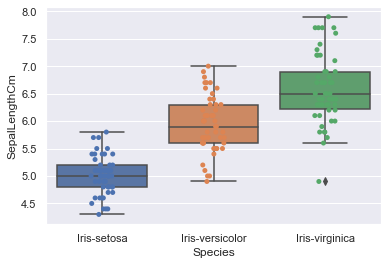

In [20]:
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
sns.stripplot(x='Species', y='SepalLengthCm', data=iris, jitter=True)

### Correlation heatmap

<AxesSubplot:>

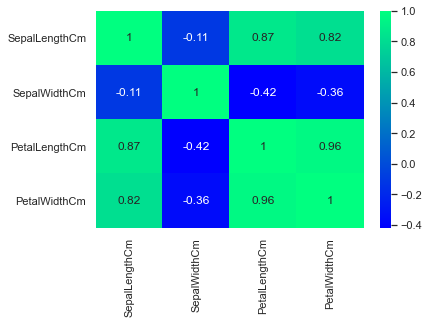

In [21]:
# Checking the correlation between variables
sns.heatmap(iris.corr(), annot=True, cmap='winter')

### Label Encoding

In [22]:
label_encoder = preprocessing.LabelEncoder()
iris['Species']=label_encoder.fit_transform(iris['Species'])

In [23]:
array = iris.values
array.shape

(150, 5)

In [24]:
X = array[:,:-1]
Y = array[:,-1]

In [25]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

## Train and Test Split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=7)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 4)
(50, 4)
(100,)
(50,)


## Building Decision Tree Classifier

### There are two methods:
    1. Using Entropy 
    2. Using Gini Index

### 1] Using Entropy Criteria

In [29]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)
#model = clf.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Visualizing the Decision Tree using Entropy

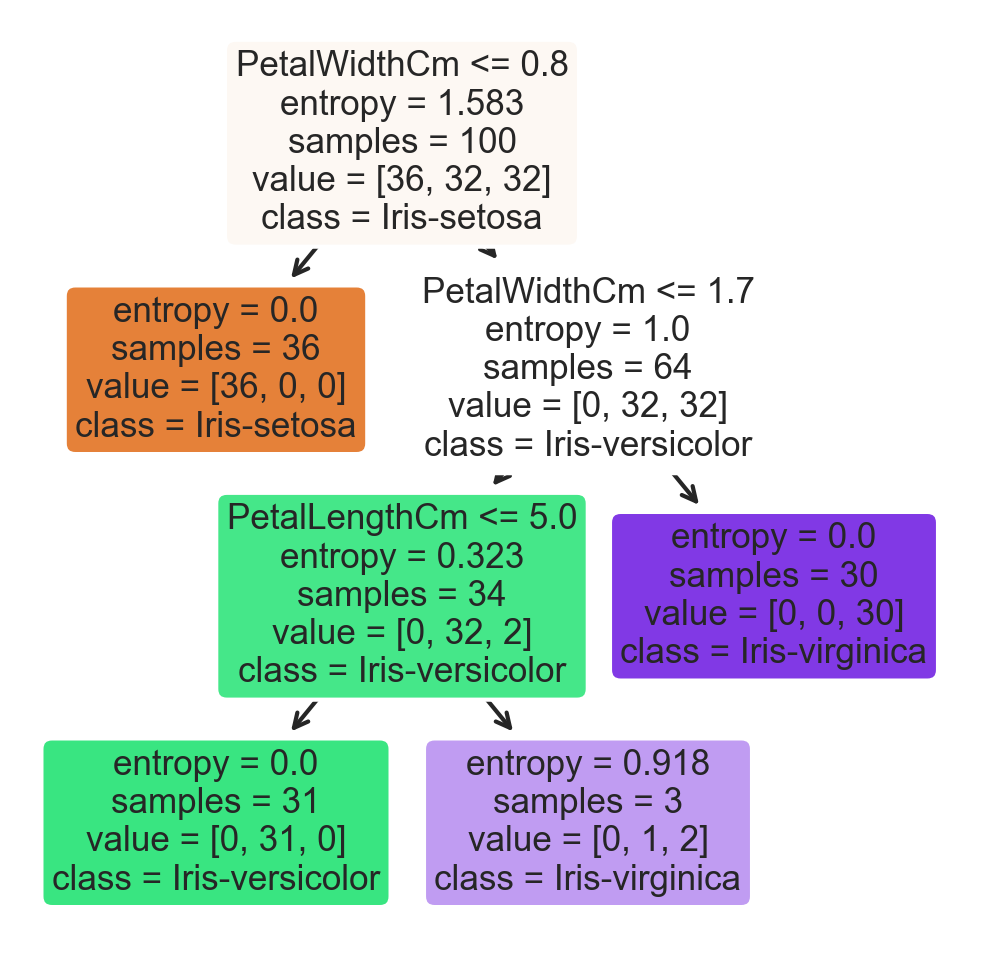

In [30]:
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#PLot the decision tree
#tree.plot_tree(model)
from sklearn import tree

fn=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cn=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)    #dpi= dots per inch
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True,
               rounded = True);

In [31]:
from sklearn import tree
tree = tree.export_text(model)
print(tree)

|--- feature_3 <= 0.80
|   |--- class: 0.0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.70
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1.0
|   |   |--- feature_2 >  5.00
|   |   |   |--- class: 2.0
|   |--- feature_3 >  1.70
|   |   |--- class: 2.0



## Prediction and computing the accuracy for test data

In [32]:
pred_test = model.predict(x_test) 
pd.Series(pred_test).value_counts() # getting the count of each category 

2.0    19
1.0    17
0.0    14
dtype: int64

In [33]:
pred_test

array([2., 1., 0., 1., 2., 0., 1., 1., 0., 1., 2., 1., 0., 2., 0., 2., 2.,
       2., 0., 0., 1., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 2., 2., 1., 0., 1., 1., 2., 0.])

In [34]:
pd.crosstab(y_test,pred_test)

col_0,0.0,1.0,2.0
row_0,,,
0.0,14,0,0
1.0,0,16,2
2.0,0,1,17


In [35]:
print('The accuracy for test data is :',np.mean(pred_test==y_test)*100)

The accuracy for test data is : 94.0


### Classification report

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.94      0.89      0.91        18
         2.0       0.89      0.94      0.92        18

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



## Predicting and computing the accuracy for train data

In [37]:
pred_train = model.predict(x_train)  
pd.Series(pred_train).value_counts() # getting the count of each category 

0.0    36
2.0    33
1.0    31
dtype: int64

In [38]:
pd.crosstab(y_train,pred_train)

col_0,0.0,1.0,2.0
row_0,,,
0.0,36,0,0
1.0,0,31,1
2.0,0,0,32


In [39]:
print('The accuracy for train data is :',np.mean(pred_train==y_train)*100)

The accuracy for train data is : 99.0


### Classification report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        36
         1.0       1.00      0.97      0.98        32
         2.0       0.97      1.00      0.98        32

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



### 2] Using Gini Index

In [41]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [42]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

## Visualizing the Decision Tree using gini index

[Text(310.0, 792.75, 'PetalLengthCm <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [36, 32, 32]\nclass = Iris-setosa'),
 Text(155.0, 566.25, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Iris-setosa'),
 Text(465.0, 566.25, 'PetalLengthCm <= 4.8\ngini = 0.5\nsamples = 64\nvalue = [0, 32, 32]\nclass = Iris-versicolor'),
 Text(310.0, 339.75, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-versicolor'),
 Text(620.0, 339.75, 'PetalWidthCm <= 1.7\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]\nclass = Iris-virginica'),
 Text(465.0, 113.25, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = Iris-versicolor'),
 Text(775.0, 113.25, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]\nclass = Iris-virginica')]

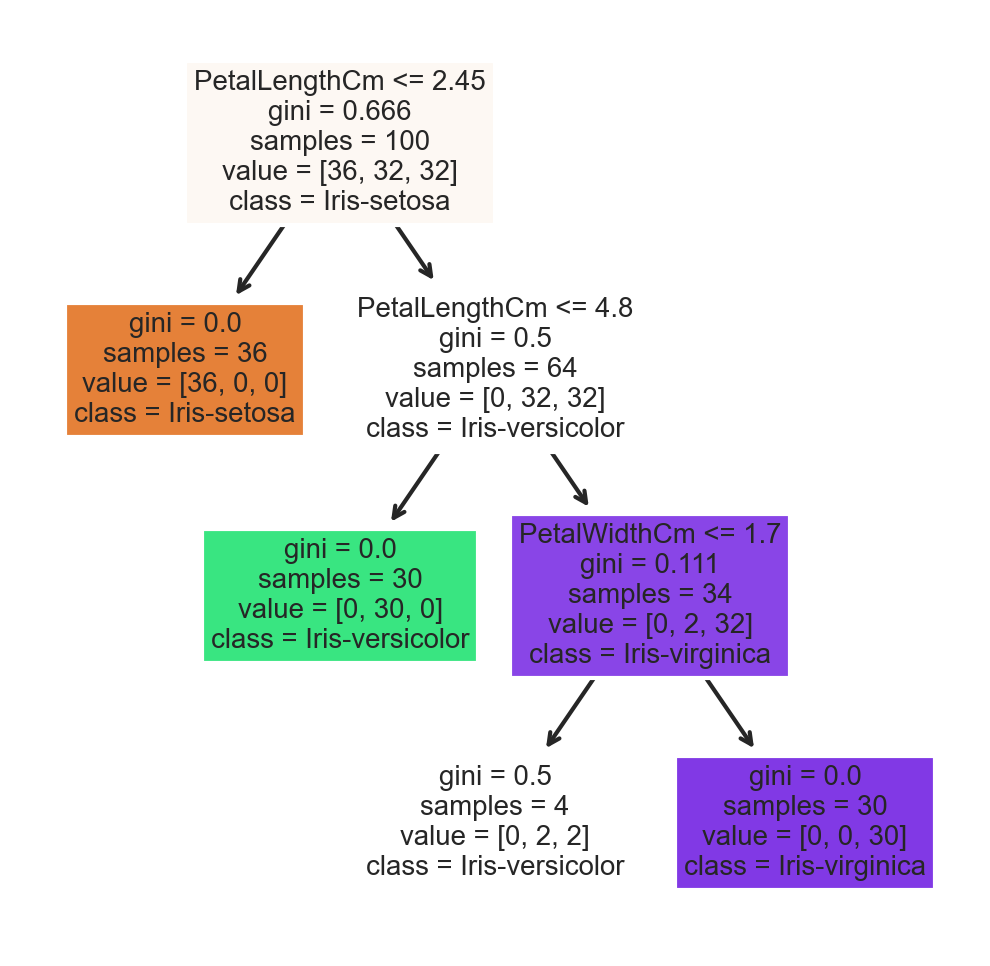

In [43]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)    #dpi= dots per inch
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [44]:
from sklearn import tree
tree = tree.export_text(model_gini)
print(tree)

|--- feature_2 <= 2.45
|   |--- class: 0.0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.80
|   |   |--- class: 1.0
|   |--- feature_2 >  4.80
|   |   |--- feature_3 <= 1.70
|   |   |   |--- class: 1.0
|   |   |--- feature_3 >  1.70
|   |   |   |--- class: 2.0



### Prediction and computing the accuracy for test data

In [45]:
pred_test1=model_gini.predict(x_test)
np.mean(pred_test1==y_test)

0.9

In [46]:
pd.crosstab(y_test,pred_test1)

col_0,0.0,1.0,2.0
row_0,,,
0.0,14,0,0
1.0,0,16,2
2.0,0,3,15


In [47]:
print('The accuracy for test data is :',np.mean(pred_test1==y_test)*100)

The accuracy for test data is : 90.0


### Classification report

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.84      0.89      0.86        18
         2.0       0.88      0.83      0.86        18

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.91        50
weighted avg       0.90      0.90      0.90        50



### Prediction and computing the accuracy for test data

In [49]:
pred_train1=model_gini.predict(x_train)
np.mean(pred_train1==y_train)

0.98

In [50]:
pd.crosstab(y_train,pred_train1)

col_0,0.0,1.0,2.0
row_0,,,
0.0,36,0,0
1.0,0,32,0
2.0,0,2,30


In [51]:
print('The accuracy for test data is :',np.mean(pred_train1==y_train)*100)

The accuracy for test data is : 98.0


### Classification report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        36
         1.0       0.94      1.00      0.97        32
         2.0       1.00      0.94      0.97        32

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

